# **Predicting 5-star Restaurants in Boston**

![an image](https://cdnimg.webstaurantstore.com/images/articles/359/blog-chefs-header.jpg)

## Project Goal
The following project and its contents have been created by Enrique Alvarez, Diego Cabrera, Shakti Das, Cara Donovan, and Enrique Esparragoza under the guidance and supervision of Professor Mohammad Soltanieh-ha.

Our goal is to predict a restaurant’s rating based on location, price, type of food, and any other variables we find in Yelp’s reviews that might be affecting the rating. Using machine learning algorithms, we will come up with a model that will allow us to predict a restaurant’s rating given an initial set of parameters. 

## Data Source

Our datasets contain information about 2,664 restaurants in Boston that were reviewed on Yelp between October 2004 and August 2020. We selected 3 datasets (restaurants, reviews, and neighbourhoods), with relevant drivers for restaurants receiving 5-stars in the Boston area.  The data has been processed by the Boston Area Research Initiative (BARI) and is divided into the three data sources mentioned above.

**Data Source:
[Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DMWCBT)**

In this initial exploratory phase, we dug into the data to understand what each variable meant and the relationships among our three sources of data.

**Dataset 1 - Restaurants (Yelp.Restaurants.csv)**

Variables: 
  - restaurant_name: shows restaurant name as posted on Yelp.
  - restaurant_ID: unique number for each restaurant.
  - restaurant_address: postal address as posted on Yelp.
  - restaurant_tag: shows tags used to describe a restaurant (cafe, restaurant, american, chinese, italian, etc).
  - rating: average rating based on reviews, this rating goes from 1 to 5 in 0.5 increments.
  - price: estimates cost of food with Yelp's classification system from $ to $$$$.
  - review_number: total reviews the restaurant has received.
  - unique_reviewer: number of unique reviewers who reviewed the restaurant.
  - reviews_MMM_YY: number of reviews in a given month.
  - restaurant_neighborhood: shows which neighborhood the restaurant is in according to Yelp.
  - GIS_ID: identifier for the land parcel the restaurant is in.
  - CT_ID_10: 2010 Census Tract ID number.


**Dataset 2 - Reviews (Yelp.Reviews.csv)**

Variables:
  - restaurant_name: shows restaurant name as posted on Yelp.
  - restaurant_ID: unique number for each restaurant.
  - review_date: shows the date the review was posted.
  - reviewer_name: username of the user who posted the review.
  - reviewer_origin: home city and state identified by the user
  - reviewer_profile: URL linking to the Yelp profile of the reviewer.
  - history_#: (where # is a number from 1 to 5) shows the number of # star reviews the user has posted on Yelp in the past.
  - reviewer_friends: number of friends the user has on Yelp.
  - reviewer_reviews: number of reviews posted by the user on Yelp.
  - reviewer photos: number of photos posted by the user on Yelp.
  - reviewer_elite: is 1 if the user has achieved elite status on Yelp, 0 otherwise.

**Dataset 3 - Neighborhoods (Yelp.CT.csv)**

Variables:
  - CT_ID_10: 2010 Census Tract ID number.
  - NUM_REST: number of restaurants located in the tract.
  - RATE_REVIEWS: frequency of reviewers per restaurant in the tract.
  - AVG_RATING: average rating of the restaurants in the tract.
  - PCT_DLRS_#: (where # is a number from 1 to 4) shows the percentageof restaurants in the tract assigned with a #-dollar sign price value by Yelp.
  - reviews_MMM_YY: number of reviews in a given month.

## Motivation
In this analysis we will explore the data and test several predivtive models for restaruant rating. If you are interested in learning how machine learning models are used to predict a variable, please keep on reading. Moreover, this analysis will also be insightful and helpful for people interested in data science, people in the restaurant indistry or any curious readers.

## Preparing the Notebook
**Import packages:** The first step to this project is gathering the data and getting it into a usable form in a csv.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import datasets:** Once libraries are imported we connect it to the Team Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive/Shareddrives/IS833_Team_7/

YELP.CT.csv  YELP.Restaurants.csv  YELP.Reviews.csv


In [ ]:
restaurants = pd.read_csv("/content/drive/Shareddrives/IS833_Team_7/YELP.Restaurants.csv")
reviews = pd.read_csv("/content/drive/Shareddrives/IS833_Team_7/YELP.Reviews.csv")
neighborhoods = pd.read_csv("/content/drive/Shareddrives/IS833_Team_7/YELP.CT.csv")

## Exploratory Data Analysis
Once we have imported the data, we will conduct an exploration phase to learn more about the data, uncover insights from the start and identify areas or patterns to dig into.

**Describe the data:** we use the info() function to get a concise summary of each Data Frame 

In [ ]:
#info for restaurants data frame
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_name          2664 non-null   object 
 1   restaurant_ID            2664 non-null   int64  
 2   restaurant_address       2664 non-null   object 
 3   restaurant_tag           2662 non-null   object 
 4   rating                   2435 non-null   float64
 5   price                    1999 non-null   object 
 6   review_number            2664 non-null   int64  
 7   unique_reviewer          2664 non-null   int64  
 8   reviews_Jan_19           2664 non-null   int64  
 9   reviews_Feb_19           2664 non-null   int64  
 10  reviews_Mar_19           2664 non-null   int64  
 11  reviews_Apr_19           2664 non-null   int64  
 12  reviews_May_19           2664 non-null   int64  
 13  reviews_Jun_19           2664 non-null   int64  
 14  reviews_Jul_19          

In [ ]:
#info for reviews data frame
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467105 entries, 0 to 467104
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   restaurant_name   467105 non-null  object 
 1   restaurant_ID     467105 non-null  int64  
 2   review_date       466749 non-null  object 
 3   reviewer_name     466749 non-null  object 
 4   reviewer_origin   466590 non-null  object 
 5   reviewer_profile  466749 non-null  object 
 6   history_1         466749 non-null  float64
 7   history_2         466749 non-null  float64
 8   history_3         466749 non-null  float64
 9   history_4         466749 non-null  float64
 10  history_5         466749 non-null  float64
 11  reviewer_friends  466749 non-null  float64
 12  reviewer_reviews  466749 non-null  float64
 13  reviewer_photos   466749 non-null  float64
 14  reviewer_elite    466749 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 53.5+ MB


In [ ]:
#info for neighborhoods data frame
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CT_ID_10        181 non-null    int64  
 1   NUM_REST        181 non-null    int64  
 2   RATE_REVIEWS    169 non-null    float64
 3   RATE_REVIEWERS  169 non-null    float64
 4   AVG_RATING      168 non-null    float64
 5   PCT_DLRS_1      169 non-null    float64
 6   PCT_DLRS_2      169 non-null    float64
 7   PCT_DLRS_3      169 non-null    float64
 8   PCT_DLRS_4      169 non-null    float64
 9   PCT_DLRS_NA     169 non-null    float64
 10  reviews_Jan_19  169 non-null    float64
 11  reviews_Feb_19  169 non-null    float64
 12  reviews_Mar_19  169 non-null    float64
 13  reviews_Apr_19  169 non-null    float64
 14  reviews_May_19  169 non-null    float64
 15  reviews_Jun_19  169 non-null    float64
 16  reviews_Jul_19  169 non-null    float64
 17  reviews_Aug_19  169 non-null    flo

In [ ]:
# Replace string value for price with numerical value
price_dict = {'$ ':1,'$$ ':2,'$$$ ':3,'$$$$ ':4,'NA':np.NaN}

restaurants = restaurants.replace({'price':price_dict})

In [ ]:
#double check that price type changed from string to int
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_name          2664 non-null   object 
 1   restaurant_ID            2664 non-null   int64  
 2   restaurant_address       2664 non-null   object 
 3   restaurant_tag           2662 non-null   object 
 4   rating                   2435 non-null   float64
 5   price                    1999 non-null   float64
 6   review_number            2664 non-null   int64  
 7   unique_reviewer          2664 non-null   int64  
 8   reviews_Jan_19           2664 non-null   int64  
 9   reviews_Feb_19           2664 non-null   int64  
 10  reviews_Mar_19           2664 non-null   int64  
 11  reviews_Apr_19           2664 non-null   int64  
 12  reviews_May_19           2664 non-null   int64  
 13  reviews_Jun_19           2664 non-null   int64  
 14  reviews_Jul_19          

**Initial Observations:**
* It looks like the price variable in the restaurants data frame is a string due to Yelp's classification system. We converted it to integer.
* In the reviews data frame, not every reviewer reviewed every restaurant. 467,105 restaurants but only 466,749 reviewers.
* In the neighborhoods dataframe, not all neighborhoods have restaurants with reviews. Looks like 169 of 181 neighborhoods have restaurants with reviews.

In [ ]:
# Split restaurant_tag into all different cuisines and join with main dataframe

cuisine = restaurants['restaurant_tag'].str.split(',', expand=True)
cuisine.insert(0, 'id', restaurants['restaurant_ID'].tolist())

display(cuisine)
restaurants.reset_index()
display(restaurants)

new_restaurants = pd.merge(restaurants, cuisine, left_on='restaurant_ID',right_on='id',how='outer').drop('id',axis=1)
display(new_restaurants)

#name different cuisine columns
new_restaurants = new_restaurants.rename(columns={0: "cuisine_1", 1: "cuisine_2", 2: "cuisine_3", 3: "cuisine_4", 4: "cuisine_5", 5: "cuisine_6"}, errors="raise")

,id,0,1,2,3,4,5
0,2,Latin American,Dominican,,None,None,None
1,3,Dominican,Empanadas,,None,None,None
2,4,Restaurants,,None,None,None,None
3,6,Diners,,None,None,None,None
4,7,Vietnamese,Coffee & Tea,Delis,,None,None
...,...,...,...,...,...,...,...
2659,3619,Lebanese,Mediterranean,Armenian,,None,None
2660,3623,Vegan,Salad,Gluten-Free,,None,None
2661,3627,Salad,Noodles,Vegetarian,,None,None
2662,3645,Salad,Vegetarian,,None,None,None


,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,...,reviews_Feb_20,reviews_Mar_20,reviews_Apr_20,reviews_May_20,reviews_Jun_20,reviews_Jul_20,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10
0,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,0,1,...,0,0,1,1,0,0,0,Roslindale,1806741000,25025140400
1,100% Delicias Express,3,"660A Centre St,Jamaica Plain, MA 02130,","Dominican,Empanadas,",4.0,NaN,26,25,1,2,...,1,0,0,0,0,0,0,Jamaica Plain,1901410000,25025120400
2,107,4,"107 Salem St,Boston, MA 02113,","Restaurants,",NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Boston,302366000,25025030400
3,140 Supper Club,6,"138 St James Ave,Boston, MA 02116,","Diners,",5.0,NaN,1,1,0,0,...,0,0,0,0,0,0,0,Boston,401087000,25025010600
4,163 Vietnamese Sandwiches & Bubble Tea,7,"66 Harrison Ave,Boston, MA 02111,","Vietnamese,Coffee & Tea,Delis,",3.5,1.0,335,335,0,0,...,1,1,0,0,2,0,1,Boston,305264000,25025070200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,anoush'ella,3619,"35 W Newton St,Boston, MA 02118,","Lebanese,Mediterranean,Armenian,",4.0,2.0,243,241,6,4,...,4,5,0,2,1,1,0,Boston,900348000,25025070500
2660,by CHLOE. Boston Seaport,3623,"107 Seaport Blvd,Boston, MA 02210,","Vegan,Salad,Gluten-Free,",4.0,2.0,295,295,2,3,...,5,1,3,1,0,2,2,Boston,602643040,25025060600
2661,honeygrow,3627,"100 Northern Ave,Boston, MA 02210,","Salad,Noodles,Vegetarian,",3.5,1.0,57,57,1,1,...,2,1,1,0,0,1,0,Boston,602641042,25025060600
2662,sweetgreen,3645,"354 Harrison Ave,Boston, MA 02118,","Salad,Vegetarian,",3.5,2.0,61,61,2,2,...,0,0,0,0,0,1,0,Boston,306624010,25025070402


,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,...,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10,0,1,2,3,4,5
0,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,0,1,...,0,Roslindale,1806741000,25025140400,Latin American,Dominican,,None,None,None
1,100% Delicias Express,3,"660A Centre St,Jamaica Plain, MA 02130,","Dominican,Empanadas,",4.0,NaN,26,25,1,2,...,0,Jamaica Plain,1901410000,25025120400,Dominican,Empanadas,,None,None,None
2,107,4,"107 Salem St,Boston, MA 02113,","Restaurants,",NaN,NaN,0,0,0,0,...,0,Boston,302366000,25025030400,Restaurants,,None,None,None,None
3,140 Supper Club,6,"138 St James Ave,Boston, MA 02116,","Diners,",5.0,NaN,1,1,0,0,...,0,Boston,401087000,25025010600,Diners,,None,None,None,None
4,163 Vietnamese Sandwiches & Bubble Tea,7,"66 Harrison Ave,Boston, MA 02111,","Vietnamese,Coffee & Tea,Delis,",3.5,1.0,335,335,0,0,...,1,Boston,305264000,25025070200,Vietnamese,Coffee & Tea,Delis,,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659,anoush'ella,3619,"35 W Newton St,Boston, MA 02118,","Lebanese,Mediterranean,Armenian,",4.0,2.0,243,241,6,4,...,0,Boston,900348000,25025070500,Lebanese,Mediterranean,Armenian,,None,None
2660,by CHLOE. Boston Seaport,3623,"107 Seaport Blvd,Boston, MA 02210,","Vegan,Salad,Gluten-Free,",4.0,2.0,295,295,2,3,...,2,Boston,602643040,25025060600,Vegan,Salad,Gluten-Free,,None,None
2661,honeygrow,3627,"100 Northern Ave,Boston, MA 02210,","Salad,Noodles,Vegetarian,",3.5,1.0,57,57,1,1,...,0,Boston,602641042,25025060600,Salad,Noodles,Vegetarian,,None,None
2662,sweetgreen,3645,"354 Harrison Ave,Boston, MA 02118,","Salad,Vegetarian,",3.5,2.0,61,61,2,2,...,0,Boston,306624010,25025070402,Salad,Vegetarian,,None,None,None


In [ ]:
# Average rating over all the restaurant data is approximately 3.5
restaurants['rating'].describe()

count    2435.000000
mean        3.514579
std         0.777068
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [ ]:
# 64,688 unique reviewers
reviews['reviewer_name'].unique().size

64688

In [ ]:
# Keeping everything in the restaurants dataframe 
# Merging in overlapping data from the reviews dataframe (i.e. left join)
rest_reviews = pd.merge(restaurants,reviews,on=['restaurant_name','restaurant_ID'],how='left')
rest_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467105 entries, 0 to 467104
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   restaurant_name          467105 non-null  object 
 1   restaurant_ID            467105 non-null  int64  
 2   restaurant_address       467105 non-null  object 
 3   restaurant_tag           467103 non-null  object 
 4   rating                   466768 non-null  float64
 5   price                    461038 non-null  float64
 6   review_number            467105 non-null  int64  
 7   unique_reviewer          467105 non-null  int64  
 8   reviews_Jan_19           467105 non-null  int64  
 9   reviews_Feb_19           467105 non-null  int64  
 10  reviews_Mar_19           467105 non-null  int64  
 11  reviews_Apr_19           467105 non-null  int64  
 12  reviews_May_19           467105 non-null  int64  
 13  reviews_Jun_19           467105 non-null  int64  
 14  revi

In [ ]:
# It looks like 356 restaurants don't have reviewers from the reviewers dataframe
rest_reviews.isnull().sum()

restaurant_name               0
restaurant_ID                 0
restaurant_address            0
restaurant_tag                2
rating                      337
price                      6067
review_number                 0
unique_reviewer               0
reviews_Jan_19                0
reviews_Feb_19                0
reviews_Mar_19                0
reviews_Apr_19                0
reviews_May_19                0
reviews_Jun_19                0
reviews_Jul_19                0
reviews_Aug_19                0
reviews_Jan_20                0
reviews_Feb_20                0
reviews_Mar_20                0
reviews_Apr_20                0
reviews_May_20                0
reviews_Jun_20                0
reviews_Jul_20                0
reviews_Aug_20                0
restaurant_neighborhood      93
GIS_ID                        0
CT_ID_10                      0
review_date                 356
reviewer_name               356
reviewer_origin             515
reviewer_profile            356
history_

In [ ]:
rev_by_month = ['reviews_Jan_19','reviews_Feb_19','reviews_Mar_19','reviews_Apr_19','reviews_May_19',
                'reviews_Jun_19','reviews_Jul_19','reviews_Aug_19','reviews_Jan_20','reviews_Feb_20',
                'reviews_Mar_20','reviews_Apr_20','reviews_May_20','reviews_Jun_20','reviews_Jul_20','reviews_Aug_20']


In [ ]:
adj_rest_reviews = rest_reviews.drop(rev_by_month,axis=1)
adj_rest_reviews.head()

,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,restaurant_neighborhood,GIS_ID,...,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite
0,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,Roslindale,1806741000,...,https://www.yelp.com/user_details?userid=S3dQs...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,Roslindale,1806741000,...,https://www.yelp.com/user_details?userid=wMHEn...,2.0,0.0,0.0,0.0,13.0,1.0,15.0,4.0,0.0
2,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,Roslindale,1806741000,...,https://www.yelp.com/user_details?userid=ZsgST...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,Roslindale,1806741000,...,https://www.yelp.com/user_details?userid=LjWAB...,2.0,1.0,2.0,6.0,3.0,0.0,14.0,0.0,0.0
4,100% Delicias,2,"635 Hyde Park Ave,Roslindale, MA 02131,","Latin American,Dominican,",2.0,2.0,37,34,Roslindale,1806741000,...,https://www.yelp.com/user_details?userid=lwcax...,1.0,0.0,0.0,9.0,21.0,142.0,31.0,34.0,0.0


**Data Visualization:** Now that we have explored our three data frames, we will use different types of graphs to find insights in the data.


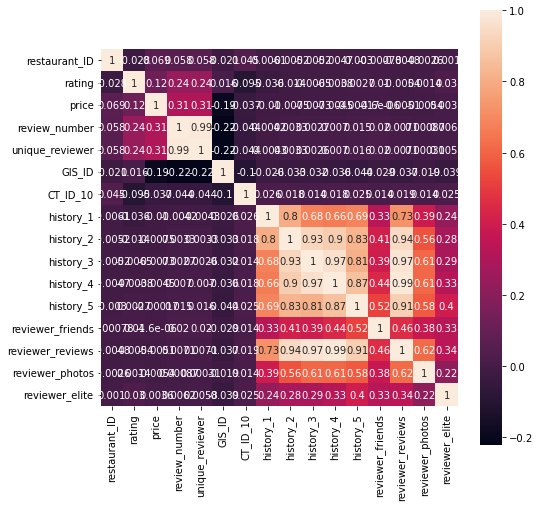

In [ ]:
#correlation matrix
plt.subplots(figsize=(8,8))
sns.heatmap(adj_rest_reviews.corr(),annot=True,square=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


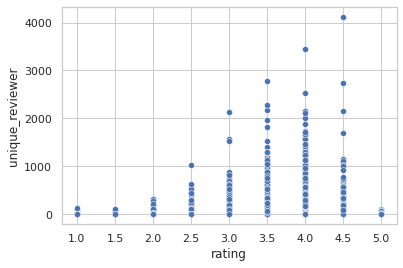

In [ ]:
# plot rating vs number of reviewers
sns.set_theme(style="whitegrid")
sns.scatterplot(new_restaurants['rating'], new_restaurants['unique_reviewer'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


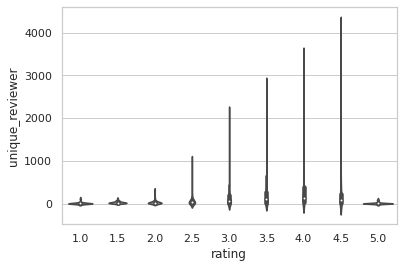

In [ ]:
# violin plot rating vs number of reviewers
sns.violinplot(new_restaurants['rating'], new_restaurants['unique_reviewer'])
plt.show()

In [ ]:
from collections import Counter

In [ ]:
#look for most common values in cuisine and create a new dataframe with reduced values
li = list(new_restaurants['cuisine_1'])
c = Counter(li)

most_common = c.most_common(20)

new_list = [x[0] for x in most_common]

#This list contains the top 20 cuisines in Boston
print(new_list)

boolean_cuisine = new_restaurants.cuisine_1.isin(new_list)
popular_restaurants = new_restaurants[boolean_cuisine]
display(popular_restaurants)

['Pizza', 'Italian', 'Restaurants', 'Sandwiches', 'Chinese', 'American (New)', 'Seafood', 'American (Traditional)', 'Mexican', 'Bars', 'Coffee & Tea', 'Cafes', 'Delis', 'Fast Food', 'Burgers', 'Sushi Bars', 'Japanese', 'Breakfast & Brunch', 'Bakeries', 'Thai']


,restaurant_name,restaurant_ID,restaurant_address,restaurant_tag,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,...,reviews_Aug_20,restaurant_neighborhood,GIS_ID,CT_ID_10,cuisine_1,cuisine_2,cuisine_3,cuisine_4,cuisine_5,cuisine_6
2,107,4,"107 Salem St,Boston, MA 02113,","Restaurants,",NaN,NaN,0,0,0,0,...,0,Boston,302366000,25025030400,Restaurants,,None,None,None,None
5,180 Cafe,8,"23 Edinboro St,Boston, MA 02111,","Cafes,",4.0,NaN,8,8,0,0,...,0,Boston,304435000,25025070101,Cafes,,None,None,None,None
6,180 Restaurant and Lounge,9,"174 Lincoln St,Boston, MA 02111,","Restaurants,",NaN,NaN,0,0,0,0,...,0,Boston,305341000,25025070101,Restaurants,,None,None,None,None
7,224 Boston Street Restaurant,11,"224 Boston St,Dorchester, MA 02125,","American (New),",4.0,2.0,248,248,1,4,...,0,Dorchester,702993000,25025090700,American (New),,None,None,None,None
8,24 Hour Pizza Delivery,12,"686 Morton St,Boston, MA 02124,","Pizza,",1.0,4.0,31,31,0,0,...,0,Dorchester Center,1404624001,25025100100,Pizza,,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2652,Vee Vee,3441,"763 Centre St,Jamaica Plain, MA 02130,","American (New),",4.0,2.0,274,274,0,1,...,2,Jamaica Plain,1901823000,25025120103,American (New),,None,None,None,None
2653,Vertex Pharmaceuticals Cafe,3448,"Boston, MA,","Cafes,",NaN,NaN,0,0,0,0,...,0,NaN,303888000,25025030300,Cafes,,None,None,None,None
2654,Vidoo,3456,"1762 Paget Plz,Boston, MA 03051,","Restaurants,",NaN,NaN,0,0,0,0,...,0,Hudson,303888000,25025030300,Restaurants,,None,None,None,None
2655,Vikos Pizza & Ribs,3462,"855 River St,Mattapan, MA 02126,","Pizza,American (Traditional),",2.5,2.0,7,7,0,0,...,0,Mattapan,1801022000,25025101002,Pizza,American (Traditional),,None,None,None


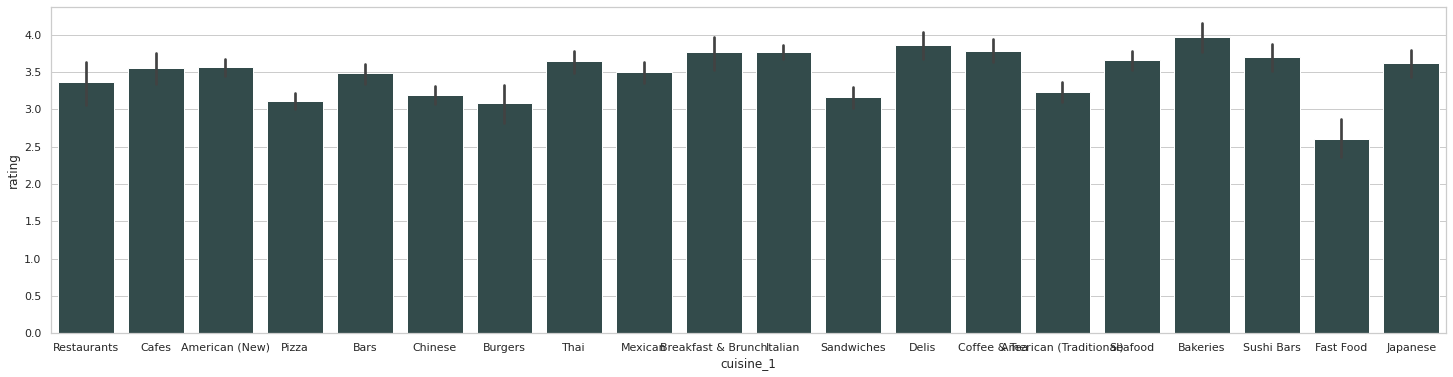

In [ ]:
#bar graph cusiine vs rating
plt.figure(figsize=(25, 6))
sns.barplot(x = 'cuisine_1', y = 'rating', data = popular_restaurants, color = 'darkslategrey')


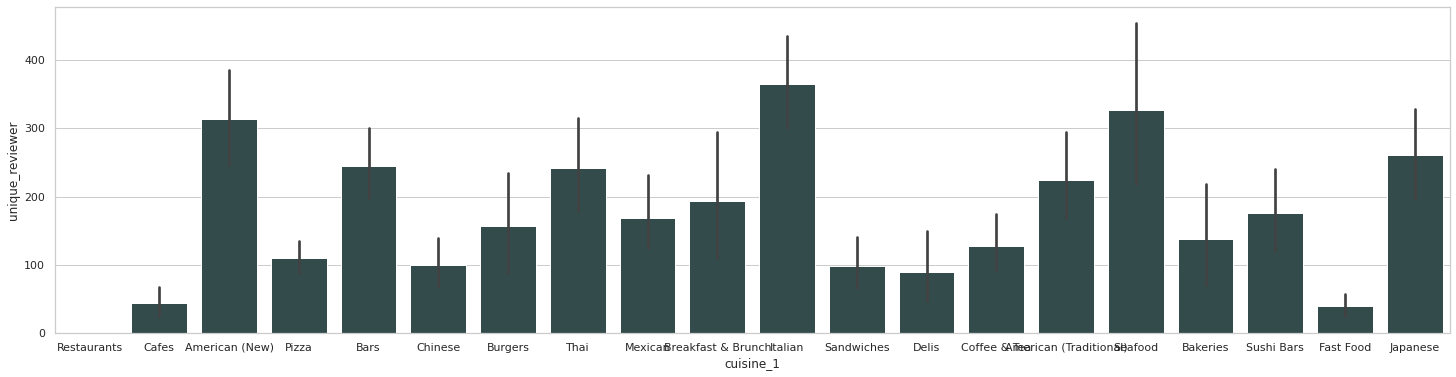

In [ ]:
#bar graph cusines vs reviewers
plt.figure(figsize=(25, 6))
sns.barplot(x = 'cuisine_1', y = 'unique_reviewer', data = popular_restaurants, color = 'darkslategrey')

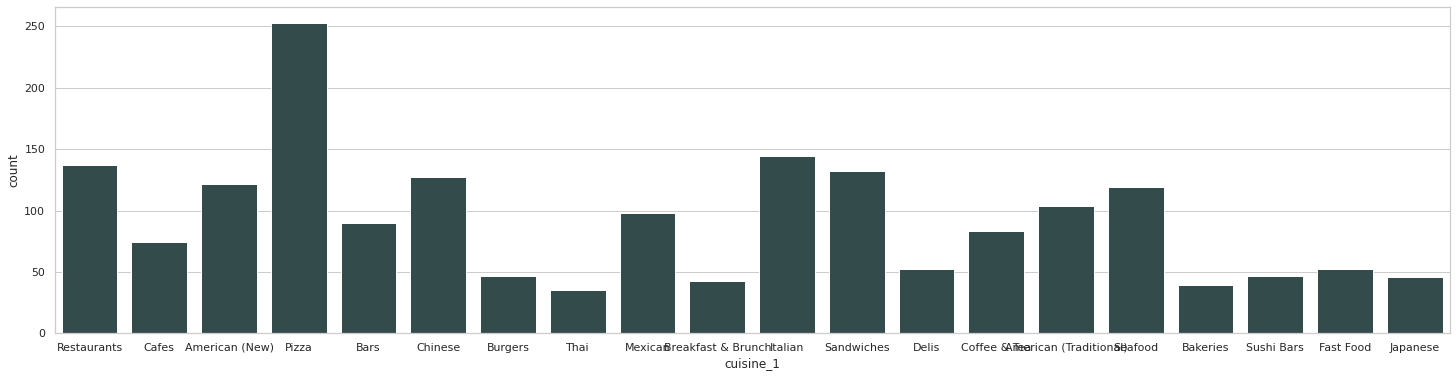

In [ ]:
#bar graph cuisine vs restaurant count
plt.figure(figsize=(25, 6))
sns.countplot(x = 'cuisine_1', data = popular_restaurants, color = 'darkslategrey')

**Observations After Visualizing Data:**
* By looking at the plot of rating vs number of reviewers, we learn that the majority of reviews are happening between the 3.5 and 4.5 star range.
* Highest rated cuisine is bakeries, lowest rated is fast food.
* Four types of cuisine stand out as the ones receiving the highest number of reviews: american, italian, seafood and japanese.
* Pizza is the most used tag by restaurants, this means that there is a high number of restaurants selling pizza in comparison to other cusisines.

***Exploratory Phase General Conclusions:***
- We are facing data regarding 2,664 restaurants in the city of Boston and each restaurant has its unique characteristics and variables that might affect rating. Prioritizing the most important variables affecting rating will be crucial for the success of our model.
- The data is clean, thanks to the processing already made by BARI, but we will still need to manipulate and convert some of our variables into dummies for them to work with a regression model.
- The data relies on the assumption that the user understands what a census tract is. In order to present final results and recommendations we will need to translate census tracts into something more commonly used like addresses, counties or zip codes.

# Predictive Models

**Methodology:** We used four models to predict restaurant rating:
1. linear regression
1. bayesian ridge
1. lasso model
1. polynomial regression

For each of these models, we evaluated 4 performance metrics: RMSE, MAPE, MAE and R-Squared.

**Linear Regression Model:**

In [ ]:
#info about the restaurants data frame, this data frame will be used for the model
new_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2663
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   restaurant_name          2664 non-null   object 
 1   restaurant_ID            2664 non-null   int64  
 2   restaurant_address       2664 non-null   object 
 3   restaurant_tag           2662 non-null   object 
 4   rating                   2435 non-null   float64
 5   price                    1999 non-null   float64
 6   review_number            2664 non-null   int64  
 7   unique_reviewer          2664 non-null   int64  
 8   reviews_Jan_19           2664 non-null   int64  
 9   reviews_Feb_19           2664 non-null   int64  
 10  reviews_Mar_19           2664 non-null   int64  
 11  reviews_Apr_19           2664 non-null   int64  
 12  reviews_May_19           2664 non-null   int64  
 13  reviews_Jun_19           2664 non-null   int64  
 14  reviews_Jul_19          

In [ ]:
new_restaurants.describe()

,restaurant_ID,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,reviews_Mar_19,reviews_Apr_19,reviews_May_19,...,reviews_Jan_20,reviews_Feb_20,reviews_Mar_20,reviews_Apr_20,reviews_May_20,reviews_Jun_20,reviews_Jul_20,reviews_Aug_20,GIS_ID,CT_ID_10
count,2664.000000,2435.000000,1999.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,...,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2.664000e+03,2.664000e+03
mean,1820.218093,3.514579,1.672836,175.956081,172.114865,1.570195,1.529279,1.845721,1.651276,1.886637,...,1.381006,1.368243,0.743243,0.271396,0.338964,0.443694,0.609610,0.432057,8.163981e+08,2.502508e+10
std,1052.474894,0.777068,0.671169,312.864835,306.009767,3.322839,3.173049,3.787621,3.448186,4.146209,...,2.858950,2.793544,1.597075,0.741653,0.938378,1.074672,1.434513,1.184406,6.794808e+08,1.678505e+05
min,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000560e+08,2.502500e+10
25%,910.750000,3.000000,1.000000,9.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.043015e+08,2.502502e+10
50%,1819.500000,3.500000,2.000000,60.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.015990e+08,2.502506e+10
75%,2724.250000,4.000000,2.000000,207.250000,203.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.400532e+09,2.502508e+10
max,3649.000000,5.000000,4.000000,5044.000000,4120.000000,42.000000,42.000000,49.000000,51.000000,85.000000,...,40.000000,33.000000,18.000000,9.000000,18.000000,10.000000,16.000000,17.000000,2.205669e+09,2.502599e+10


**Preprocessing:** prior building the model we will preprocess the data, drop useless variables and replace missing values.


1. We will drop the following fields as we won't need them for regression model: 'restaurant_name', 'restaurant_address', 'restaurant_tag', 'restaurant_neighborhood'
2. 229 missing values for 'rating'; we will replace with 3.5 which is the mean rating.
3. 665 missing values for 'price'; we will replace with 1.67 which is the mean price. 
4. There are two many missing values for cuisine categories 3-6. We won't use these fields and will drop them.
5. 2 missing values for cuisine categories 1 and 2. We will impute with the most common cuisine type. 
5. We will convert cuisine categories 1 and 2 to dummy variables.





In [ ]:
new_restaurants.drop(['restaurant_ID','restaurant_name','restaurant_address','restaurant_tag','restaurant_neighborhood','cuisine_3','cuisine_4','cuisine_5','cuisine_6'],axis=1,inplace=True)
new_restaurants['rating'].fillna(new_restaurants['rating'].mean(skipna=True),inplace=True)
new_restaurants['price'].fillna(new_restaurants['price'].mean(skipna=True),inplace=True)
new_restaurants['cuisine_1'].fillna(new_restaurants['cuisine_1'].value_counts().idxmax(),inplace=True)
new_restaurants['cuisine_2'].fillna(new_restaurants['cuisine_2'].value_counts().idxmax(),inplace=True)

In [ ]:
new_restaurants['cuisine_1']=new_restaurants['cuisine_1'].astype('category')
new_restaurants['cuisine_2']=new_restaurants['cuisine_2'].astype('category')
new_restaurants.info()
new_restaurants = pd.get_dummies(new_restaurants,['cuisine_1','cuisine_2'],drop_first=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 0 to 2663
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   rating           2664 non-null   float64 
 1   price            2664 non-null   float64 
 2   review_number    2664 non-null   int64   
 3   unique_reviewer  2664 non-null   int64   
 4   reviews_Jan_19   2664 non-null   int64   
 5   reviews_Feb_19   2664 non-null   int64   
 6   reviews_Mar_19   2664 non-null   int64   
 7   reviews_Apr_19   2664 non-null   int64   
 8   reviews_May_19   2664 non-null   int64   
 9   reviews_Jun_19   2664 non-null   int64   
 10  reviews_Jul_19   2664 non-null   int64   
 11  reviews_Aug_19   2664 non-null   int64   
 12  reviews_Jan_20   2664 non-null   int64   
 13  reviews_Feb_20   2664 non-null   int64   
 14  reviews_Mar_20   2664 non-null   int64   
 15  reviews_Apr_20   2664 non-null   int64   
 16  reviews_May_20   2664 non-null   int64   


In [ ]:
new_restaurants.head()

,rating,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,reviews_Mar_19,reviews_Apr_19,reviews_May_19,reviews_Jun_19,...,cuisine_2_Tiki Bars,cuisine_2_Trinidadian,cuisine_2_Vegan,cuisine_2_Vegetarian,cuisine_2_Venezuelan,cuisine_2_Venues & Event Spaces,cuisine_2_Vietnamese,cuisine_2_Whiskey Bars,cuisine_2_Wine Bars,cuisine_2_Wraps
0,2.000000,2.000000,37,34,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,4.000000,1.672836,26,25,1,2,3,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.514579,1.672836,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.000000,1.672836,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.500000,1.000000,335,335,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_restaurants.isnull().sum()

rating                             0
price                              0
review_number                      0
unique_reviewer                    0
reviews_Jan_19                     0
                                  ..
cuisine_2_Venues & Event Spaces    0
cuisine_2_Vietnamese               0
cuisine_2_Whiskey Bars             0
cuisine_2_Wine Bars                0
cuisine_2_Wraps                    0
Length: 319, dtype: int64

Create Feature Matrix

In [ ]:
x = new_restaurants.drop('rating',axis=1)
x.shape

(2664, 318)

Create Target Vector

In [ ]:
y = new_restaurants['rating']
y.shape

(2664,)

Split Data Into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=833)

Instantiate and Fit Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(Xtrain, ytrain) 

LinearRegression()

Predict on Test Data

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
results = test.join(pd.Series(y_model, name='predicted')).head(50)
                                                    

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

0.527979011983763

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest, y_model)

0.19412515000672506

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_model)

0.5057370950490677

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest, y_model)

0.09628269053552296

Performance Metrics for Linear Regression Model:

Metric             | Result
-------------------|------------------
RMSE               | 0.51
MAPE               | 19.4%
MAE                | 0.53
R-squared          | 0.096


Below we will train and test additional models to see if we can increase performance.

**Bayesian Ridge:**

In [ ]:
from sklearn import linear_model
model = linear_model.BayesianRidge()                     
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)   

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(50)

,index,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,reviews_Mar_19,reviews_Apr_19,reviews_May_19,reviews_Jun_19,...,cuisine_2_Vegan,cuisine_2_Vegetarian,cuisine_2_Venezuelan,cuisine_2_Venues & Event Spaces,cuisine_2_Vietnamese,cuisine_2_Whiskey Bars,cuisine_2_Wine Bars,cuisine_2_Wraps,rating,predicted
0,2314,2.000000,1830,1826,11,7,16,6,9,8,...,0,0,0,0,0,0,0,0,3.500000,3.918100
1,1045,2.000000,69,69,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,3.500000,3.511745
2,2054,1.000000,14,14,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2.500000,2.786483
3,1912,2.000000,487,487,5,0,6,1,4,3,...,0,0,0,0,0,0,0,0,3.500000,3.779835
4,2150,1.000000,335,334,1,4,2,2,1,3,...,0,0,0,0,0,0,0,0,3.000000,3.749144
5,2346,2.000000,2805,2788,24,16,30,20,26,26,...,0,0,0,0,0,0,0,0,3.500000,3.946792
6,1046,1.000000,15,15,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,3.000000,3.223098
7,1598,1.000000,61,61,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,2.000000,3.158826
8,2255,1.000000,15,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.000000,3.499556
9,298,3.000000,106,106,4,3,9,1,4,3,...,0,0,0,0,0,0,0,0,3.500000,3.600620


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

0.500380951100139

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest, y_model)

0.18825568782963026

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_model)

0.4650836507401755

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest, y_model)

0.1689275917518982

Performance Metrics for Bayesian Ridge Regression Model

Metric             | Result
-------------------|------------------
RMSE               | 0.46
MAPE               | 18.8%
MAE                | 0.5
R-squared          | 0.17


**Lasso Model:**

In [ ]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=1)          
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)  

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(50)

,index,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,reviews_Mar_19,reviews_Apr_19,reviews_May_19,reviews_Jun_19,...,cuisine_2_Vegan,cuisine_2_Vegetarian,cuisine_2_Venezuelan,cuisine_2_Venues & Event Spaces,cuisine_2_Vietnamese,cuisine_2_Whiskey Bars,cuisine_2_Wine Bars,cuisine_2_Wraps,rating,predicted
0,2314,2.000000,1830,1826,11,7,16,6,9,8,...,0,0,0,0,0,0,0,0,3.500000,4.111410
1,1045,2.000000,69,69,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,3.500000,3.581640
2,2054,1.000000,14,14,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2.500000,3.459947
3,1912,2.000000,487,487,5,0,6,1,4,3,...,0,0,0,0,0,0,0,0,3.500000,3.721495
4,2150,1.000000,335,334,1,4,2,2,1,3,...,0,0,0,0,0,0,0,0,3.000000,3.585392
5,2346,2.000000,2805,2788,24,16,30,20,26,26,...,0,0,0,0,0,0,0,0,3.500000,4.419317
6,1046,1.000000,15,15,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,3.000000,3.469803
7,1598,1.000000,61,61,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,2.000000,3.504611
8,2255,1.000000,15,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.000000,3.478869
9,298,3.000000,106,106,4,3,9,1,4,3,...,0,0,0,0,0,0,0,0,3.500000,3.493763


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

0.5365698787885148

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest, y_model)

0.20334873441763018

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_model)

0.5427774249845236

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest, y_model)

0.030094175517262345

Performance Metrics for /Lasso Regression Model

Metric             | Result
-------------------|------------------
RMSE               | 0.54
MAPE               | 20.3%
MAE                | 0.53
R-squared          | 0.03


**Polynomial Regression Model:**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)  

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head(50)

,index,price,review_number,unique_reviewer,reviews_Jan_19,reviews_Feb_19,reviews_Mar_19,reviews_Apr_19,reviews_May_19,reviews_Jun_19,...,cuisine_2_Vegan,cuisine_2_Vegetarian,cuisine_2_Venezuelan,cuisine_2_Venues & Event Spaces,cuisine_2_Vietnamese,cuisine_2_Whiskey Bars,cuisine_2_Wine Bars,cuisine_2_Wraps,rating,predicted
0,2314,2.000000,1830,1826,11,7,16,6,9,8,...,0,0,0,0,0,0,0,0,3.500000,4.781386
1,1045,2.000000,69,69,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,3.500000,3.337257
2,2054,1.000000,14,14,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2.500000,2.529838
3,1912,2.000000,487,487,5,0,6,1,4,3,...,0,0,0,0,0,0,0,0,3.500000,4.024497
4,2150,1.000000,335,334,1,4,2,2,1,3,...,0,0,0,0,0,0,0,0,3.000000,3.731989
5,2346,2.000000,2805,2788,24,16,30,20,26,26,...,0,0,0,0,0,0,0,0,3.500000,3.970933
6,1046,1.000000,15,15,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,3.000000,3.230899
7,1598,1.000000,61,61,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,2.000000,3.208567
8,2255,1.000000,15,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.000000,3.529719
9,298,3.000000,106,106,4,3,9,1,4,3,...,0,0,0,0,0,0,0,0,3.500000,4.070394


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_model)

0.6299373457831785

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest, y_model)

0.22195827026392945

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_model)

0.8593448597978967

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest, y_model)

-0.5355899976515179

Performance Metrics for Polynomial Regression Model

Metric             | Result
-------------------|------------------
MSE                | 0.85
MAPE               | 22.19%
MAE                | 0.62
R-squared          | -0.54


## Final Conclusion
After testing our four models, we concluded that the Bayesian Ridge model is the best to predict rating because it had the lower Mean Absolute Error (MAE). Moreover, the Bayesian Ridge model also had the lowest Mean Standard Error (MSE). The MAE measure is relative to the data set so we needed to interpret what a MAE of 0.5 meant. For our model, this meant that we might predict a rating and that rating could be off by 0.5. Also, we needed to take into account that ratings go from 1 to 5. 

Despite having a winner, we were aware that these results must be taken with a grain of salt. The R-squared (R2) was low for all models so we had to be careful and critical about the accuracy of the models. We were aware that some fields of study have an inherently greater amount of unexplainable variation and in these areas, the R2 values are bound to be lower. For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes. In this analysis, we were dealing with a topic that is very subjective like rating the quality of a restaurant, so this is why our criteria for selecting the best model was MAE and not R2. 

##Report Summary
In this project our goal was to predict the rating of restaurants in Boston and we accomplished this task succesfully by going through all the stages of a business analytics problem. Initially we had a brainstorming stage in which we defined our problem and selected the data source. Subsequently, all the data was cleaned and went through the initial exploration phase described in this notebook. After gathering our initial observations, we went ahead and preprocessed the data once again,  removing irrelevant measures and replacing missing values to run the predictive models. Finally, we tested 4 different models and selected the bayesian ridge as winner (MAE=0.5). Applying this structured process that is followed in business to make data-driven predicitons and take better decisions was extremley enriching for all of us.  

## Dashboard

[Rating Prediciton of Restaurants in Boston](https://datastudio.google.com/reporting/28315781-93f0-46ef-b67b-caa4b8ec61fc)